In [207]:
#!pip3 install tensorflow

In [241]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import math
import random
import tensorflow as tf

In [242]:
def get_image_label(data, dir, indices):
    # just looking at 2 examples for testing purposes
    X = np.array([np.asarray(Image.open(f'{dir}{data.iloc[i].id_code}.png')) for i in indices[:2]])
    y = np.array([int(data.iloc[i].diagnosis) for i in indices[:2]])

    return X,y

def get_dataset(path, dir):

    data = pd.read_csv(path)
    arr = [i for i in range(len(data))]
    random.shuffle(arr)
    train_indices = arr[:2]
    train_X, train_y = get_image_label(data, dir, train_indices)
    train_X = train_X / 255.0

    return train_X, train_y


test_X, test_y = get_dataset("/u/scratch/r/rosemary/train.csv",
                                                 '/u/scratch/r/rosemary/train_images_smol/')
X1 = test_X[0]
X2 = test_X[1]
y1 = test_y[0]
y2 = test_y[1]

In [243]:
X1.shape

(160, 160, 3)

In [244]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)

def mix_up(X1,y1,X2,y2, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = X1,y1
    #print('.labels_one.shape=',labels_one.shape)
    images_two, labels_two = X2,y2
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    #print("l.shape=",l.shape)
    x_l = tf.reshape(l, (1, 1, 1))
    y_l = tf.reshape(l, ( 1))
    #print("y_l.shape=",y_l.shape)

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    #print("labels.shape",labels.shape)
    return (images, labels)

1


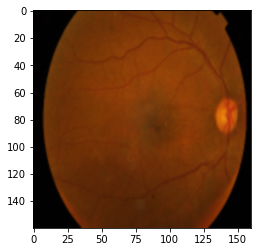

In [245]:
from torchvision import transforms

plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(X1)), interpolation="bicubic")
print(y1)

3


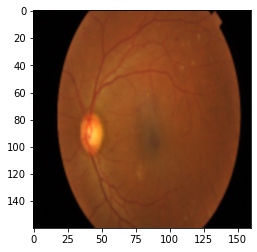

In [246]:
plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(X2)), interpolation="bicubic")
print(y2)

In [247]:
X1=X1.reshape(1,160,160,3)
y1=y1.reshape(1,1)


X2=X2.reshape(1,160,160,3)
y2=y2.reshape(1,1)

(1, 1)
(160, 160, 3)
[1.2315387]


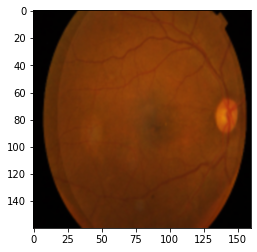

In [248]:
X, y = mix_up(X1,y1,X2,y2)

#print(X.shape)
X=X.numpy()
X=X.reshape(160, 160, 3)
y=y.numpy()
print(y.shape)
y=y.reshape(1)
print(X.shape)
#pic=X.numpy()
#X = X.astype(np.uint8)

plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(X)), interpolation="bicubic")

print(y)